In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

df = pd.read_csv('synthetic_student_data.csv')  
df.head()

,Name,Age,Degree,GPA,Domain Interested,Learning Module Preference,Time Spent Daily (hrs)
0,Bob Smith,21,AIDS,8.74,Python,Personalized Roadmap,8
1,Bob Martinez,20,Cyber,6.75,Cloud Computing,Personalized Roadmap,4
2,Emma Rodriguez,20,AIDS,7.94,Web Dev,Fixed Roadmap,2
3,Emma Jones,22,Civil,8.44,Python,Personalized Roadmap,1
4,John Smith,22,Mechanical,8.26,Cloud Computing,Fixed Roadmap,10


In [4]:
df.tail()

,Name,Age,Degree,GPA,Domain Interested,Learning Module Preference,Time Spent Daily (hrs)
9995,Bob Williams,18,AIDS,5.99,Web Dev,Fixed Roadmap,8
9996,Jane Smith,19,CSE,4.81,Java,Fixed Roadmap,1
9997,David Jones,18,Cyber,4.48,C++,Fixed Roadmap,8
9998,Alice Brown,21,Cyber,9.56,Cloud Computing,Fixed Roadmap,6
9999,James Davis,19,Civil,8.40,Python,Fixed Roadmap,4


In [5]:
df.shape

(10000, 7)

In [6]:
df.isnull().sum()

Name                          0
Age                           0
Degree                        0
GPA                           0
Domain Interested             0
Learning Module Preference    0
Time Spent Daily (hrs)        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        10000 non-null  object 
 1   Age                         10000 non-null  int64  
 2   Degree                      10000 non-null  object 
 3   GPA                         10000 non-null  float64
 4   Domain Interested           10000 non-null  object 
 5   Learning Module Preference  10000 non-null  object 
 6   Time Spent Daily (hrs)      10000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


In [8]:
df.describe()

,Age,GPA,Time Spent Daily (hrs)
count,10000.000000,10000.000000,10000.000000
mean,19.975900,7.004820,5.522000
std,1.418351,1.729008,2.871435
min,18.000000,4.000000,1.000000
25%,19.000000,5.510000,3.000000
50%,20.000000,6.990000,6.000000
75%,21.000000,8.500000,8.000000
max,22.000000,10.000000,10.000000


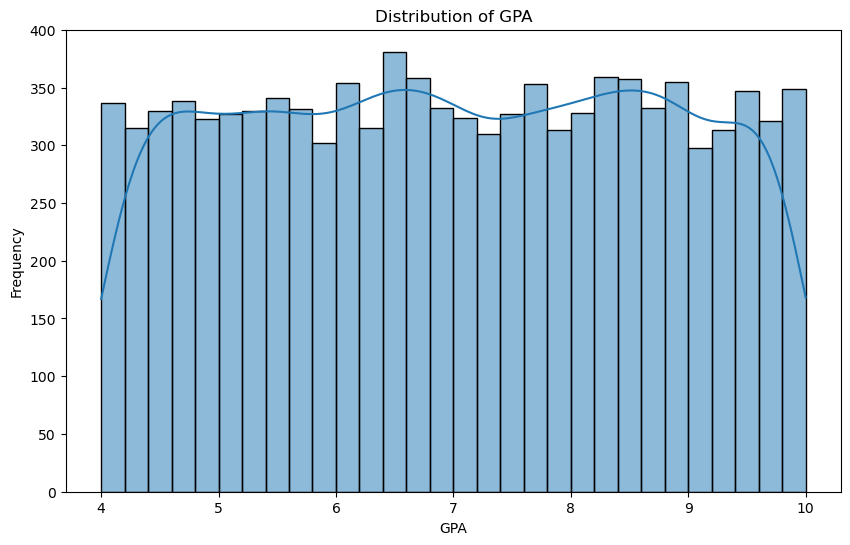

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GPA'], kde=True, bins=30)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()


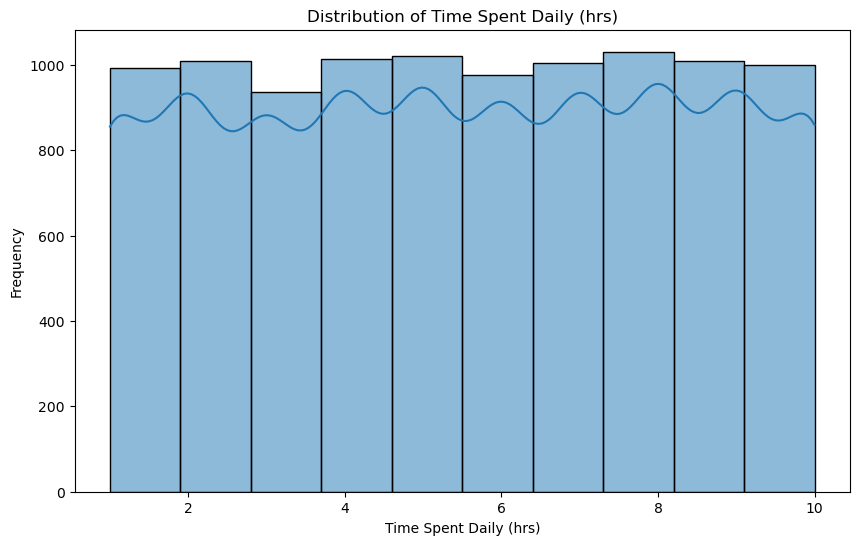

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time Spent Daily (hrs)'], kde=True, bins=10)
plt.title('Distribution of Time Spent Daily (hrs)')
plt.xlabel('Time Spent Daily (hrs)')
plt.ylabel('Frequency')
plt.show()

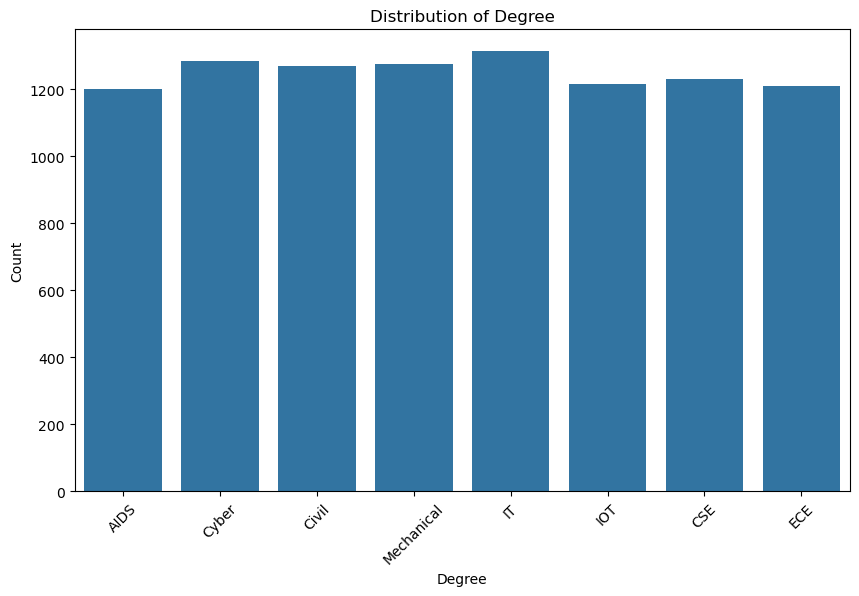

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Degree')
plt.title('Distribution of Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


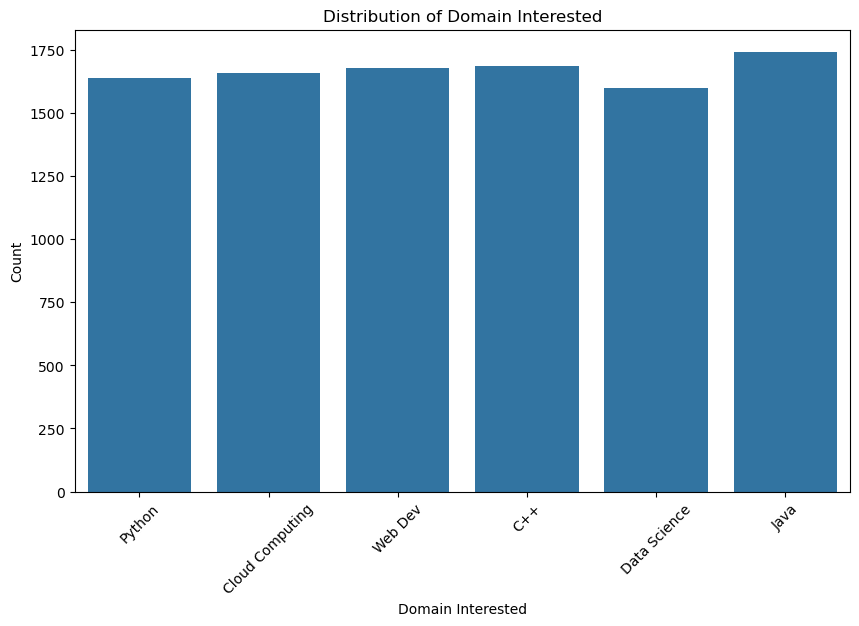

In [12]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Domain Interested')
plt.title('Distribution of Domain Interested')
plt.xlabel('Domain Interested')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


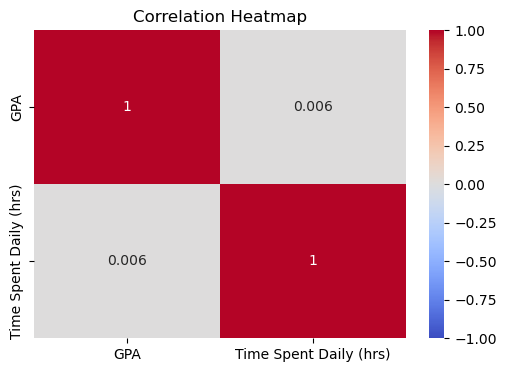

In [13]:
corr = df[['GPA', 'Time Spent Daily (hrs)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


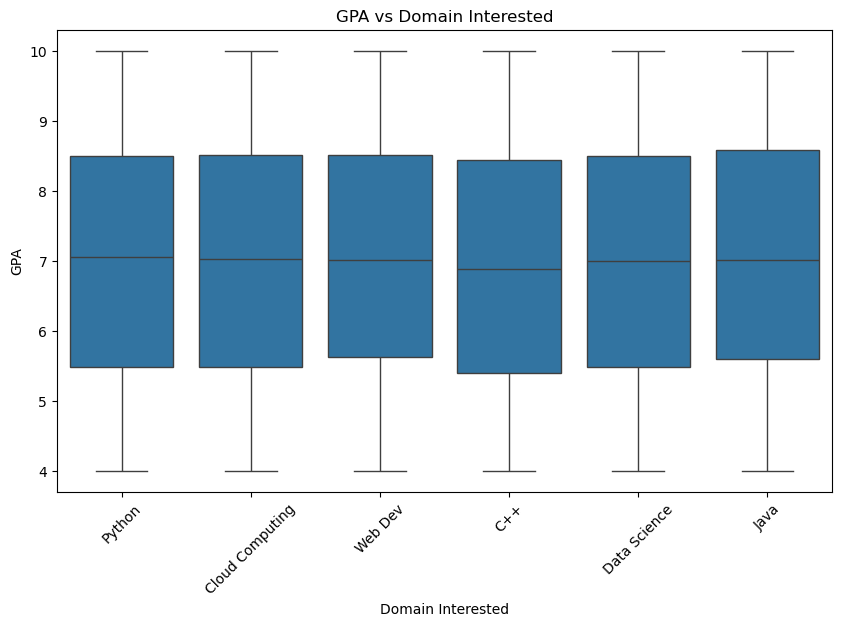

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Domain Interested', y='GPA')
plt.title('GPA vs Domain Interested')
plt.xlabel('Domain Interested')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.show()


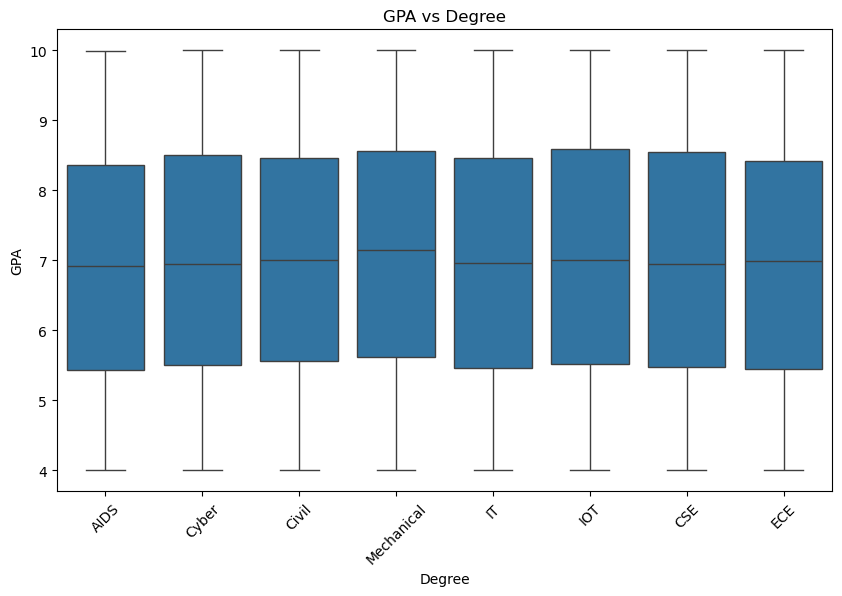

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Degree', y='GPA')
plt.title('GPA vs Degree')
plt.xlabel('Degree')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.show()

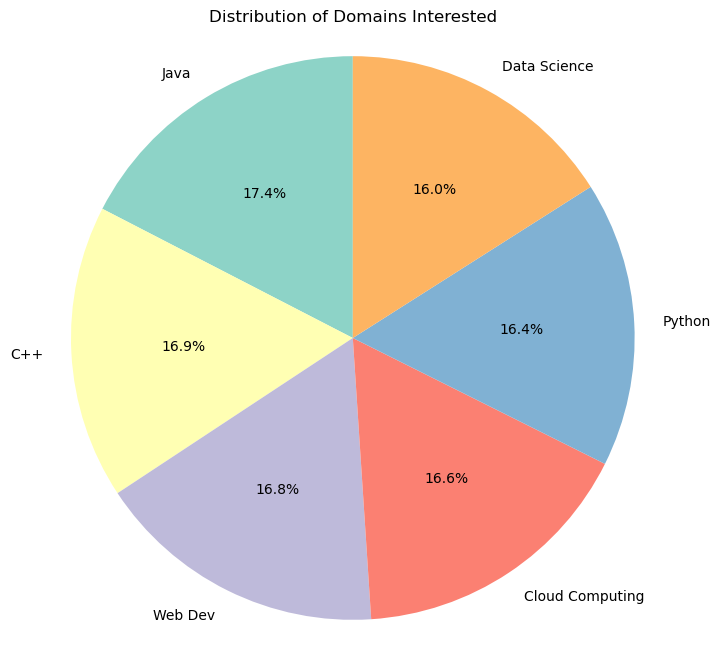

In [16]:

domain_counts = df['Domain Interested'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(domain_counts)))
plt.title('Distribution of Domains Interested')
plt.axis('equal')  
plt.show()


In [17]:

le_domain = LabelEncoder()
df['Domain Interested'] = le_domain.fit_transform(df['Domain Interested'])

In [18]:

X = df[['GPA']]  
y = df['Domain Interested']  

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}


In [21]:
results = {}

for model_name, model in models.items():
   
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix
    }

c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Farooq\anaconda3\Lib\site-pa

In [22]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Model: Logistic Regression
Accuracy: 0.179
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.35      0.24       350
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       310
           3       0.18      0.66      0.28       356
           4       0.00      0.00      0.00       321
           5       0.00      0.00      0.00       346

    accuracy                           0.18      2000
   macro avg       0.06      0.17      0.09      2000
weighted avg       0.06      0.18      0.09      2000

Confusion Matrix:
[[123   0   0 227   0   0]
 [106   0   0 211   0   0]
 [101   0   0 209   0   0]
 [121   0   0 235   0   0]
 [112   0   0 209   0   0]
 [115   0   0 231   0   0]]

Model: Random Forest
Accuracy: 0.154
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.16      0.17       350
           1       0.15      0.15      0

In [23]:
from sklearn.ensemble import StackingClassifier

base_learners = [
    ('logreg', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC())
]

stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)


StackingClassifier(estimators=[('logreg', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [24]:
y_pred_stacking = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
stacking_class_report = classification_report(y_test, y_pred_stacking)
stacking_conf_matrix = confusion_matrix(y_test, y_pred_stacking)

print(f"Stacking Model Accuracy: {stacking_accuracy}")
print(f"Stacking Model Classification Report:\n{stacking_class_report}")
print(f"Stacking Model Confusion Matrix:\n{stacking_conf_matrix}")


Stacking Model Accuracy: 0.1735
Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.22      0.22       350
           1       0.17      0.21      0.19       317
           2       0.00      0.00      0.00       310
           3       0.17      0.35      0.23       356
           4       0.15      0.15      0.15       321
           5       0.15      0.09      0.12       346

    accuracy                           0.17      2000
   macro avg       0.14      0.17      0.15      2000
weighted avg       0.15      0.17      0.15      2000

Stacking Model Confusion Matrix:
[[ 77  60   0 128  51  34]
 [ 47  68   0 120  54  28]
 [ 53  68   0 106  50  33]
 [ 58  77   0 123  55  43]
 [ 61  54   0 122  47  37]
 [ 66  63   0 133  52  32]]


c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Accuracy Comparison:
Logistic Regression: 0.179
Random Forest: 0.154
SVM: 0.17
Decision Tree: 0.158
KNN: 0.1645
Stacking Model: 0.1735


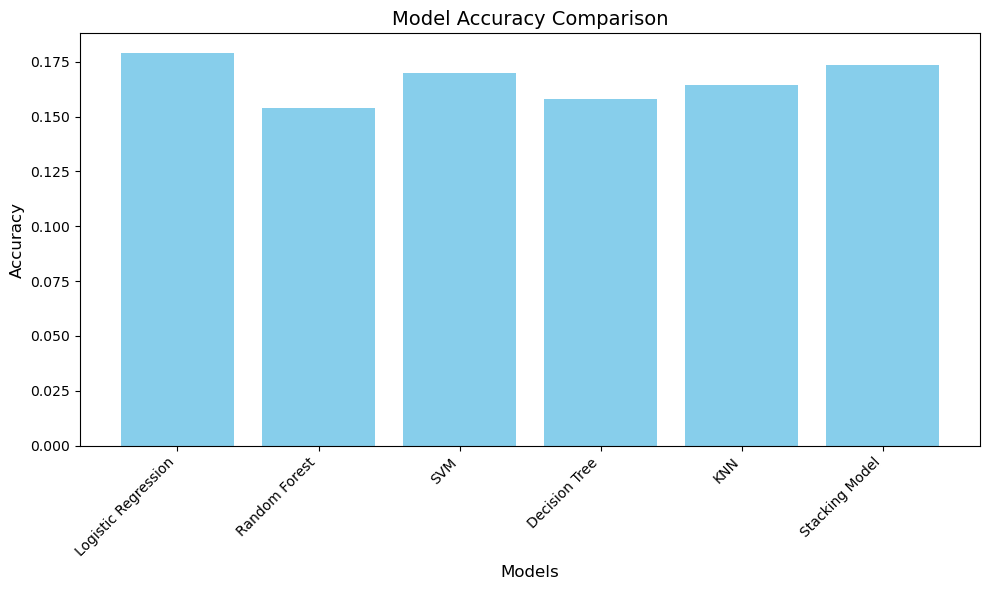

In [25]:

print("\nAccuracy Comparison:")
model_names = list(results.keys()) 
accuracies = [result['accuracy'] for result in results.values()] 
accuracies.append(stacking_accuracy) 
model_names.append('Stacking Model') 
for model_name, accuracy in zip(model_names, accuracies):
    print(f"{model_name}: {accuracy}")

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


In [34]:
def predict_domain(gpa, stacking_model, le_domain):
   
    input_data = np.array([[gpa]]) 
    
    predicted_domain_encoded = stacking_model.predict(input_data)

    predicted_domain = le_domain.inverse_transform(predicted_domain_encoded)
    
    return predicted_domain[0]

gpa_input = 8.9

predicted_domain = predict_domain(gpa_input, stacking_model, le_domain)
print(f"Predicted Domain for GPA {gpa_input}: {predicted_domain}")


Predicted Domain for GPA 8.9: Java


c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Farooq\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [27]:
import joblib

# Save each model
for model_name, model in models.items():
    filename = f"{model_name}_model.pkl"
    joblib.dump(model, filename)  # Save model to a .pkl file

# Save the stacking model
stacking_filename = 'stacking_model.pkl'
joblib.dump(stacking_model, stacking_filename)


['stacking_model.pkl']